In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# OPS 예측 데이터

In [2]:
mlb_df = pd.read_csv('./data/mlb_season_data.csv')
mlb_df

C:\Users\playdata2\AppData\Local\Temp\ipykernel_16036\3699836054.py:1: DtypeWarning: Columns (13,16,17,19,21) have mixed types. Specify dtype option on import or set low_memory=False.
  mlb_df = pd.read_csv('./data/mlb_season_data.csv')


,season,first_name,last_name,link,position,team,games_played,at_bats,runs,hits,...,homeruns,rbi,walks,strikeouts,stolen_bases,caught_stealing,batting_average,on_base_percentage,slugging_percentage,on_base_plus_slugging
0,1876,Bob,Addy,/player/110074,X,CHI,32,142,36,40,...,0,16,5,0.0,--,--,0.282,--,0.324,--
1,1876,Art,Allison,/player/110170,X,LOU,31,130,9,27,...,0,10,2,6.0,--,--,0.208,--,0.238,--
2,1876,Doug,Allison,/player/110172,C,HAR,44,163,19,43,...,0,15,3,9.0,--,--,0.264,--,0.288,--
3,1876,Fred,Andrus,/player/110275,X,CHI,8,36,6,11,...,0,2,0,5.0,--,--,0.306,--,0.389,--
4,1876,Cap,Anson,/player/110284,3B,CHI,66,309,63,110,...,2,59,12,8.0,--,--,0.356,--,0.450,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104062,2024,Josh,Winckowski,/player/670174,P,BOS,40,0,0,0,...,0,0,0,0.0,0,0,0.000,0.0,0.000,0.0
104063,2024,Eric,Yang,/player/687066,X,CIN,1,1,0,0,...,0,0,0,1.0,0,0,0.000,0.0,0.000,0.0
104064,2024,Kirby,Yates,/player/489446,P,TEX,61,0,0,0,...,0,0,0,0.0,0,0,0.000,0.0,0.000,0.0
104065,2024,Alex,Young,/player/622065,P,CIN,3,0,0,0,...,0,0,0,0.0,0,0,0.000,0.0,0.000,0.0


In [3]:
mlb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104067 entries, 0 to 104066
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   season                 104067 non-null  int64  
 1   first_name             103751 non-null  object 
 2   last_name              104067 non-null  object 
 3   link                   104067 non-null  object 
 4   position               104067 non-null  object 
 5   team                   104067 non-null  object 
 6   games_played           104067 non-null  int64  
 7   at_bats                104067 non-null  int64  
 8   runs                   104067 non-null  int64  
 9   hits                   104067 non-null  int64  
 10  doubles                104067 non-null  int64  
 11  triples                104067 non-null  int64  
 12  homeruns               104067 non-null  int64  
 13  rbi                    104067 non-null  object 
 14  walks                  104067 non-nu

## 데이터 전처리

In [4]:
# 포지션 P(투수) 인덱스 제거
# 야수들 데이터만 있게 하고 싶어서.
drop_position = ['P', 'X']
for i in range(len(drop_position)):
    mlb_df = mlb_df[mlb_df['position'] != drop_position[i]]

mlb_df['position'].value_counts()

position
C     10989
2B     6918
LF     6697
3B     6607
SS     6575
1B     6131
RF     6109
CF     5696
DH     1236
PH      103
OF       35
PR       25
Name: count, dtype: int64

In [5]:
# 결측치 수정 필요해 보이는 컬럼
# rbi, stolen_bases, caught_stealing, on_base_percentage,on_base_plus_slugging

columns = ['rbi', 'stolen_bases', 'caught_stealing', 'on_base_percentage','on_base_plus_slugging']

for i in range(len(columns)):
    column = columns[i]
    mlb_df[column] = pd.to_numeric(mlb_df[column],  errors='coerce')
    rbi_mean = mlb_df[column].mean()
    mlb_df[column] = mlb_df[column].fillna(rbi_mean)
    print(mlb_df[column].describe())

count    57121.000000
mean        31.572796
std         30.058801
min          0.000000
25%          6.000000
50%         23.000000
75%         50.000000
max        191.000000
Name: rbi, dtype: float64
count    57121.000000
mean         5.354748
std          9.134019
min          0.000000
25%          0.000000
50%          2.000000
75%          6.000000
max        130.000000
Name: stolen_bases, dtype: float64
count    57121.000000
mean         2.448484
std          2.963434
min          0.000000
25%          0.000000
50%          2.448484
75%          2.448484
max         42.000000
Name: caught_stealing, dtype: float64
count    57121.000000
mean         0.308545
std          0.091841
min          0.000000
25%          0.279000
50%          0.317000
75%          0.353000
max          1.000000
Name: on_base_percentage, dtype: float64
count    57121.000000
mean         0.661401
std          0.216390
min          0.000000
25%          0.579000
50%          0.679000
75%          0.774000
ma

In [6]:
columns = ['season', 'first_name', 'last_name', 'link','team',
       'games_played', 'at_bats', 'runs', 'rbi', 'walks', 'strikeouts', 'stolen_bases',
       'caught_stealing']

mlb_df = mlb_df.drop(columns, axis=1)
mlb_df

,position,hits,doubles,triples,homeruns,batting_average,on_base_percentage,slugging_percentage,on_base_plus_slugging
2,C,43,4,0,0,0.264,0.308545,0.288,0.661401
4,3B,110,9,7,2,0.356,0.308545,0.450,0.661401
5,2B,138,21,14,1,0.429,0.308545,0.590,0.661401
6,3B,85,11,4,0,0.300,0.308545,0.367,0.661401
8,C,0,0,0,0,0.000,0.308545,0.000,0.661401
...,...,...,...,...,...,...,...,...,...
103993,RF,0,0,0,0,0.000,0.000000,0.000,0.000000
104004,RF,0,0,0,0,0.000,0.000000,0.000,0.000000
104007,C,0,0,0,0,0.000,0.000000,0.000,0.000000
104011,RF,0,0,0,0,0.000,0.000000,0.000,0.000000


## Box Plot

In [7]:
columns =['batting_average', 'on_base_percentage','slugging_percentage','on_base_plus_slugging']


for i in columns :
    print(f'''
[{i}]
최소값 : {np.min(mlb_df[i])}
사분위수(Q1) : {np.percentile(mlb_df[i], 25)}
사분위수(Q2) : {np.percentile(mlb_df[i], 50)}
사분위수(Q3) : {np.percentile(mlb_df[i], 75)}
최대값 : {np.max(mlb_df[i])}
''')


[batting_average]
최소값 : 0.0
사분위수(Q1) : 0.216
사분위수(Q2) : 0.253
사분위수(Q3) : 0.284
최대값 : 1.0


[on_base_percentage]
최소값 : 0.0
사분위수(Q1) : 0.279
사분위수(Q2) : 0.317
사분위수(Q3) : 0.353
최대값 : 1.0


[slugging_percentage]
최소값 : 0.0
사분위수(Q1) : 0.288
사분위수(Q2) : 0.36
사분위수(Q3) : 0.427
최대값 : 3.0


[on_base_plus_slugging]
최소값 : 0.0
사분위수(Q1) : 0.579
사분위수(Q2) : 0.679
사분위수(Q3) : 0.774
최대값 : 4.0



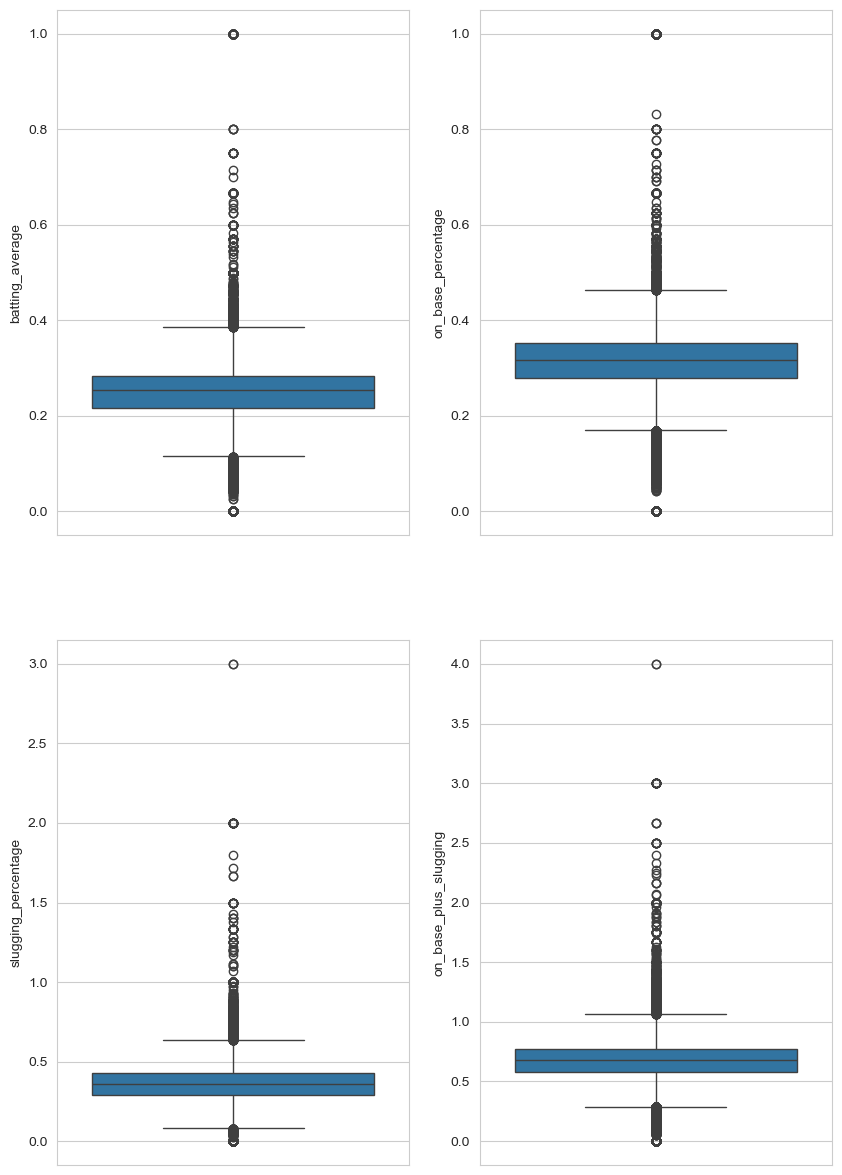

In [8]:
columns =[
    ['batting_average', 'on_base_percentage'],
    ['slugging_percentage','on_base_plus_slugging']
]

fig, ax = plt.subplots(2, 2, figsize = (10, 15))

for i in range(len(columns)):
    for j in range(len(columns)):
        column = columns[i][j]
        sns.boxplot(mlb_df[column], ax=ax[i][j])
        
plt.show()

## Hist Plot

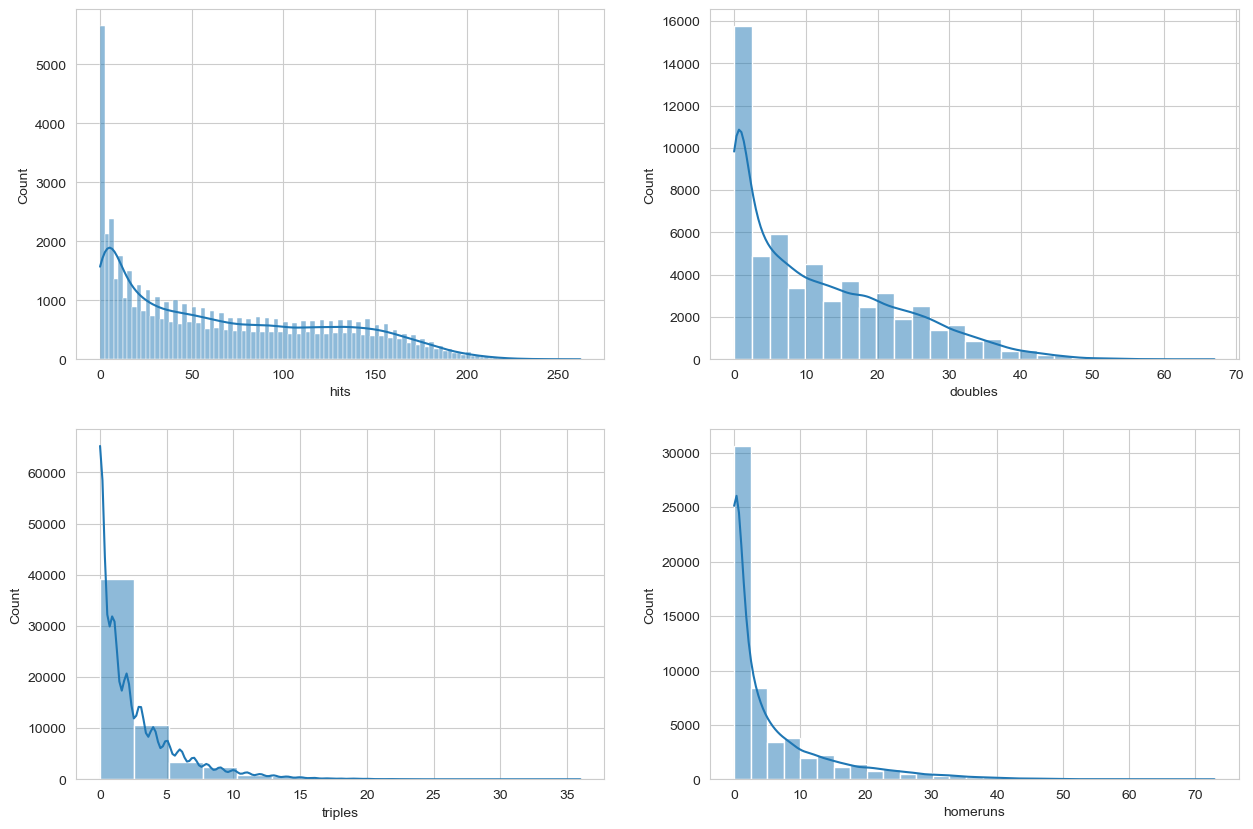

In [9]:
columns =[ 
    ['hits','doubles'], 
    ['triples', 'homeruns']
]

fig, ax = plt.subplots(2, 2, figsize = (15, 10))

for i in range(len(columns)):
    for j in range(len(columns[i])):
        column = columns[i][j]
        sns.histplot(mlb_df[column], ax=ax[i, j],binwidth = 2.5, kde = True)
plt.show()

## Pie Chart

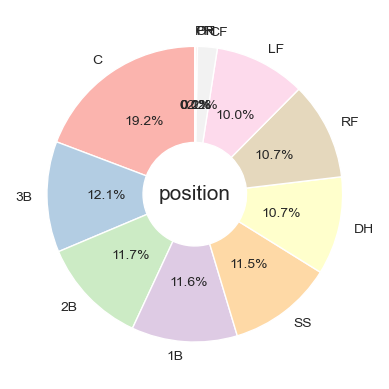

In [10]:
positions = ['C', '3B', '2B', '1B', 'SS', 'DH', 'RF', 'LF', 'CF', 'PH', 'OF','PR']

plt.pie(
    mlb_df['position'].value_counts(),
    labels = positions,
    autopct = '%.1f%%',
    startangle = 90,
    colors = sns.color_palette("Pastel1",9) ,
    wedgeprops = {'width' : 0.65}
)

plt.text(0, 0, 'position', ha = 'center', va = 'center', fontsize = 15)

plt.show()

## 상관관계

In [11]:
corr_matrix = mlb_df.corr(numeric_only=True)
corr_matrix

,hits,doubles,triples,homeruns,batting_average,on_base_percentage,slugging_percentage,on_base_plus_slugging
hits,1.000000,0.924918,0.651934,0.647330,0.418831,0.385234,0.469073,0.459811
doubles,0.924918,1.000000,0.543450,0.674154,0.386455,0.362375,0.490585,0.463904
triples,0.651934,0.543450,1.000000,0.208487,0.299802,0.260648,0.302714,0.300240
homeruns,0.647330,0.674154,0.208487,1.000000,0.241899,0.271602,0.510380,0.440513
batting_average,0.418831,0.386455,0.299802,0.241899,1.000000,0.844818,0.852306,0.896353
on_base_percentage,0.385234,0.362375,0.260648,0.271602,0.844818,1.000000,0.749088,0.908466
slugging_percentage,0.469073,0.490585,0.302714,0.510380,0.852306,0.749088,1.000000,0.950865
on_base_plus_slugging,0.459811,0.463904,0.300240,0.440513,0.896353,0.908466,0.950865,1.000000


<Axes: >

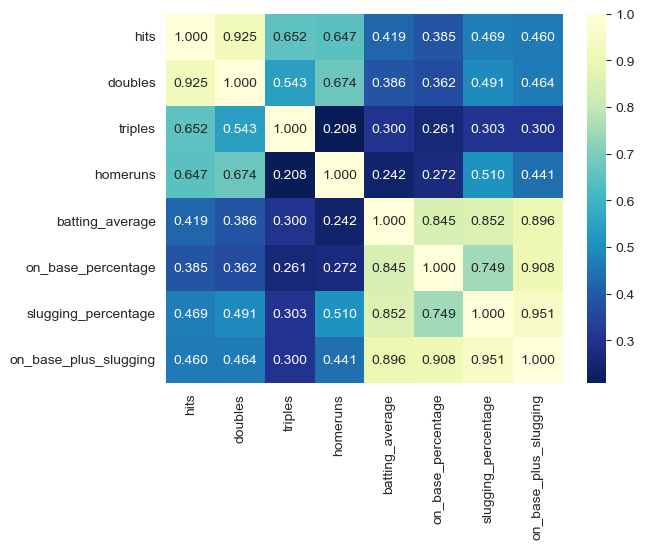

In [12]:
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='YlGnBu_r')

In [18]:
from sklearn.preprocessing import LabelEncoder


def encode_feature(df):
    """
    범주형 데이터를 숫자로 인코딩
    """
    categories = ['position']
    for cate in categories:
        label_encoder = LabelEncoder()
        df[cate] = label_encoder.fit_transform(df[cate])
    return df
encode_feature(mlb_df)

,position,hits,doubles,triples,homeruns,batting_average,on_base_percentage,slugging_percentage,on_base_plus_slugging
2,3,43,4,0,0,0.264,0.308545,0.288,0.661401
4,2,110,9,7,2,0.356,0.308545,0.450,0.661401
5,1,138,21,14,1,0.429,0.308545,0.590,0.661401
6,2,85,11,4,0,0.300,0.308545,0.367,0.661401
8,3,0,0,0,0,0.000,0.308545,0.000,0.661401
...,...,...,...,...,...,...,...,...,...
103993,10,0,0,0,0,0.000,0.000000,0.000,0.000000
104004,10,0,0,0,0,0.000,0.000000,0.000,0.000000
104007,3,0,0,0,0,0.000,0.000000,0.000,0.000000
104011,10,0,0,0,0,0.000,0.000000,0.000,0.000000


In [19]:
mlb_df.columns

Index(['position', 'hits', 'doubles', 'triples', 'homeruns', 'batting_average',
       'on_base_percentage', 'slugging_percentage', 'on_base_plus_slugging'],
      dtype='object')

## 산점도 + 회귀선

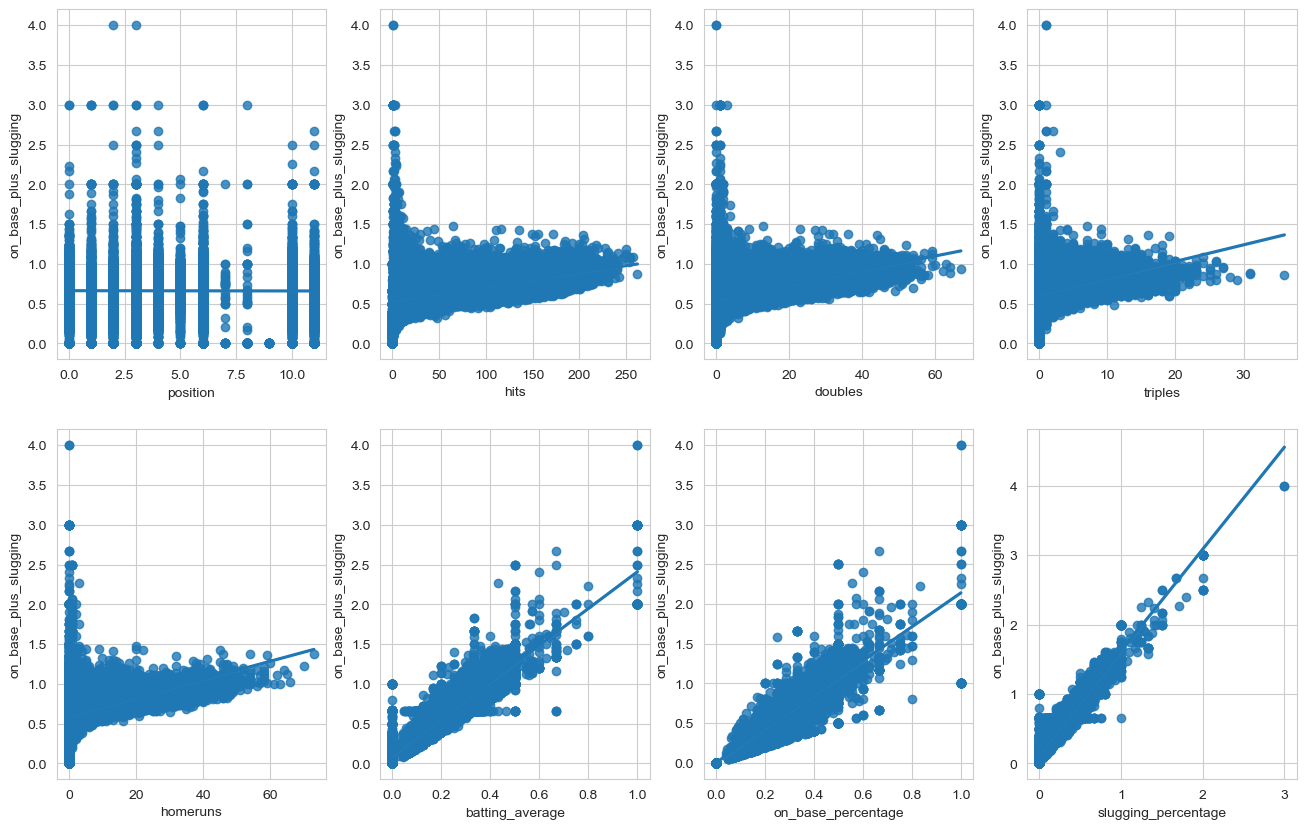

In [20]:
fig, ax = plt.subplots(figsize=(16, 10), ncols=4, nrows=2)

columns = ['position','hits', 'doubles', 'triples', 'homeruns', 'batting_average','on_base_percentage', 'slugging_percentage']

for i, col_name in enumerate(columns):
    #            i 0 1 2 3 4 5 6 7
    row = i // 4 # 0 0 0 0 1 1 1 1
    col = i % 4  # 0 1 2 3 0 1 2 3
    ax_ = ax[row][col] 
    
    # sns.scatterplot(data=boston_df, x=col_name, y='MEDV', ax=ax_)
    # scatter + line plot(회귀선)
    sns.regplot(data=mlb_df, x=col_name, y='on_base_plus_slugging', ax=ax_)

## 학습/테스트 데이터 분리

In [21]:
# 데이터 준비
from sklearn.model_selection import train_test_split

X = mlb_df.drop('on_base_plus_slugging', axis = 1)
y = mlb_df['on_base_plus_slugging']
print(X.shape, y.shape)

# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


(57121, 8) (57121,)


((42840, 8), (14281, 8), (42840,), (14281,))

## 스케일링

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-0.68752359,  0.07711891, -0.51808772, ..., -0.03639072,
        -0.0040821 , -0.46377784],
       [ 1.50984366, -0.84608311, -0.6082965 , ...,  0.93454442,
         0.60715271,  0.63365724],
       [-0.68752359,  1.29644234,  0.92525275, ...,  0.49643954,
         0.34730451,  0.88307431],
       ...,
       [-0.68752359,  0.40807813,  0.47420885, ..., -0.09559408,
         0.94278998,  0.79043369],
       [-0.68752359,  1.27902343,  1.46650542, ...,  0.5556429 ,
         0.86700092,  1.11111277],
       [-0.68752359, -0.65447514, -0.69850528, ..., -0.51001762,
        -0.9194555 , -0.17872977]])

## 교차검증

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression  # 예시로 회귀 모델 사용

# 회귀 모델 생성 (원하는 모델로 바꿔도 돼요)
lr = LinearRegression()
cv = 5

# 교차 검증 수행 (MSE로 평가)
scores_mse = cross_val_score(lr, X_train_scaled, y_train, cv=cv, scoring='neg_mean_squared_error')
print("각 회차 MSE 점수:", -scores_mse)

# 교차 검증 수행 (MAE로 평가)
scores_mae = cross_val_score(lr, X_train_scaled, y_train, cv=cv, scoring='neg_mean_absolute_error')
print("각 회차 MAE 점수:", -scores_mae)

# 교차 검증 수행 (R²로 평가)
scores_r2 = cross_val_score(lr, X_train_scaled, y_train, cv=cv, scoring='r2')
print("각 회차 R² 점수:", scores_r2)

print(f'''
[최종점수]
MSE 점수 : {np.mean(-scores_mse)}
MAE 점수 : {np.mean(-scores_mae)}
RMSE 점수 : {np.sqrt(np.mean(-scores_mse))}
R² 점수 : {np.mean(scores_r2)}
''')

각 회차 MSE 점수: [0.00036448 0.00037665 0.00027542 0.00038944 0.00036603]
각 회차 MAE 점수: [0.00463343 0.00470139 0.00430133 0.00491496 0.0047671 ]
각 회차 R² 점수: [0.99247267 0.99214425 0.99418157 0.99172832 0.99188104]

[최종점수]
MSE 점수 : 0.0003544044614340735
MAE 점수 : 0.00466364185126001
RMSE 점수 : 0.018825633095173017
R² 점수 : 0.9924815718516342



## Poly

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

model = Pipeline([
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ('lr', LinearRegression())
])

# 훈련
model.fit(X_train_scaled, y_train) # 다항변환후 학습
print(model.score(X_train_scaled, y_train), model.score(X_test_scaled, y_test))

y_pred = model.predict(X_test_scaled)

def evaluate_regression(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = root_mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f'''
[최종점수]
MSE 점수 : {mse},
MAE 점수 : {mae},
RMSE 점수 : {rmse},
R² 점수 : {r2}
''')

evaluate_regression(y_test, y_pred)

0.9932775325374062 0.9918922896885719

[최종점수]
MSE 점수 : 0.0003709133147519862,
MAE 점수 : 0.005185590975431504,
RMSE 점수 : 0.01925910991588101,
R² 점수 : 0.9918922896885719



In [36]:
# pipeline내 모델의 회귀계수/절편 
lr = model.named_steps['lr']
print(lr.coef_, lr.intercept_)

# 선형회귀식의 계산 - y = w1x1 + w2x2 + ... + b
coef = lr.coef_
intercept = lr.intercept_

poly = model.named_steps['poly']

# 예측값 확인 : 선형회귀식의 계산은 행렬곱을 통해 처리된다.
X_sample = poly.transform(X_test_scaled)[0] 
print(X_sample.shape, coef.shape)
y_sample = np.dot(X_sample, coef) + intercept
y_sample, model.predict(X_test_scaled)[0] # on_base_plus_slugging 예측값

[-2.06790368e-03 -1.83984775e-02  7.50199402e-03  5.74828501e-03
  1.46838578e-02  2.52334572e-02  9.29527250e-02  1.11014228e-01
 -3.13524645e-04  2.51045772e-03 -1.23025236e-03 -4.28456242e-04
 -2.47185993e-03 -2.40560236e-03 -1.90406532e-03  5.60243386e-03
  2.95451272e-02 -1.49537251e-02 -1.60991954e-02 -4.60806708e-02
 -1.27133029e-01  4.44488861e-02  7.24616718e-02  4.54883227e-04
  5.02298457e-03  1.20883336e-02  5.00503457e-02 -2.02453467e-02
 -2.53338128e-02  1.87769341e-03  1.19608643e-02  3.10900447e-02
 -5.06944915e-03 -2.54478632e-02  1.69006491e-02  1.26779350e-01
 -4.76768784e-02 -6.98755026e-02  1.22821839e-01 -4.27985952e-02
 -2.08047407e-01 -8.13509953e-03  5.84767159e-02  7.86475482e-02
  9.07987272e-04  4.66645887e-04 -4.69552187e-04 -2.33943675e-04
 -6.48618512e-05 -7.79901095e-04  8.10510006e-04 -1.03600423e-04
  9.24513438e-05 -9.82665051e-05 -1.27185310e-04 -9.05072891e-04
 -3.65857580e-03  9.99542660e-04  4.87982073e-03  1.11336425e-04
 -2.42132942e-04  1.56843

(0.6030424458106345, 0.6030424458106345)